<a href="https://colab.research.google.com/github/GulsahYagci34/Apache-Spark-beginner/blob/master/tensowflow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow - MNIST

1.[Load in the data](#1)

2.[Built the model](#2)

In [1]:
import tensorflow as tf

<a id='1'></a><br>
1. Load in the data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train,x_test = x_train/255.0, x_test/255.0
print('x_train.shape: ',x_train.shape)

x_train.shape:  (60000, 28, 28)


<a id='2'></a><br>
2. Built the model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

3. Compile the model

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

4. Train the model

In [7]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9148 - val_loss: 0.1379 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1400 - accuracy: 0.9583 - val_loss: 0.0977 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1034 - accuracy: 0.9687 - val_loss: 0.0876 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9727 - val_loss: 0.0826 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9766 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9792 - val_loss: 0.0669 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0575 - accuracy: 0.9809 - val_loss: 0.0658 - val_accuracy:

5. Plot loss per iteration

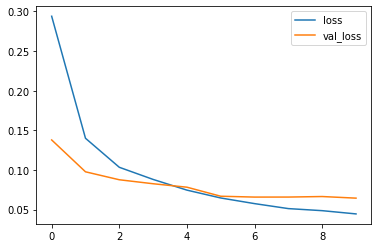

In [8]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

6. Plot accuracy per iteration

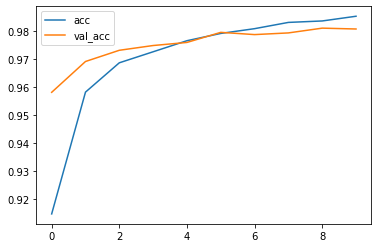

In [9]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

7. Evaluate the model

In [10]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0645 - accuracy: 0.9808
[0.06445347517728806, 0.9807999730110168]


8. Plot confusion matrix

Confusion matrix, without normalization
[[ 967    1    3    1    0    1    4    1    2    0]
 [   0 1128    2    1    0    1    2    0    1    0]
 [   0    2 1014    2    4    0    1    5    4    0]
 [   0    0    2  996    0    2    0    5    3    2]
 [   0    1    1    0  968    0    5    0    1    6]
 [   2    1    0   12    2  865    4    2    3    1]
 [   3    3    2    1    6    4  938    0    1    0]
 [   1    6    9    3    0    0    0 1005    0    4]
 [   2    1    4    5    5    3    0    4  947    3]
 [   1    4    0    8    6    1    0    8    1  980]]


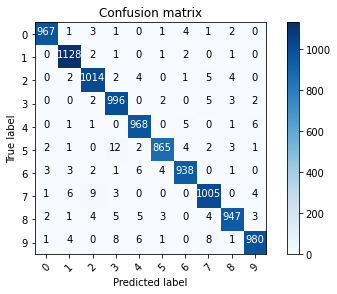

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

8. Show some misclassified examples

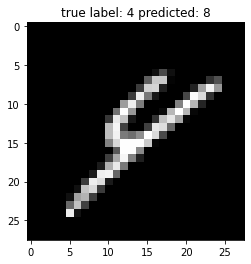

In [21]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('true label: %s predicted: %s' %(y_test[i],p_test[i]));